# House Price Prediction

In [46]:
import os

## Importing Libraries 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load datasets

In [3]:
train = pd.read_csv('train_house.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train = pd.read_csv('test_house.csv')
test.shape
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print(train.shape,test.shape)

(1460, 80) (1459, 79)


## Features in the dataset

In [7]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# EDA

There are 1460 instances of training data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analysing the target feature

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

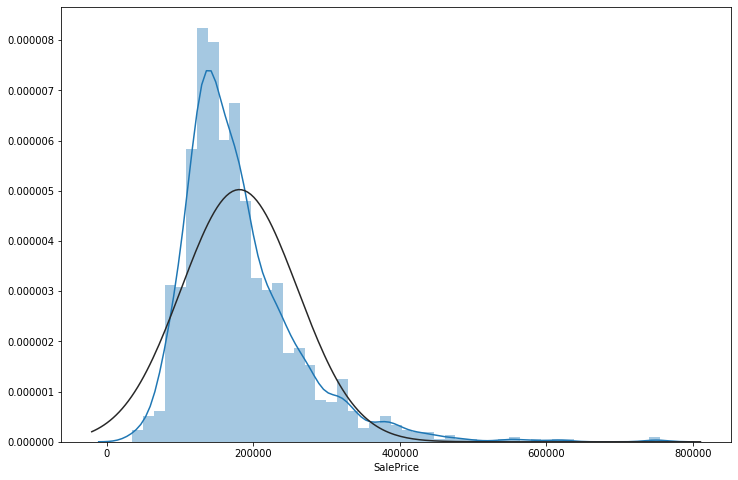

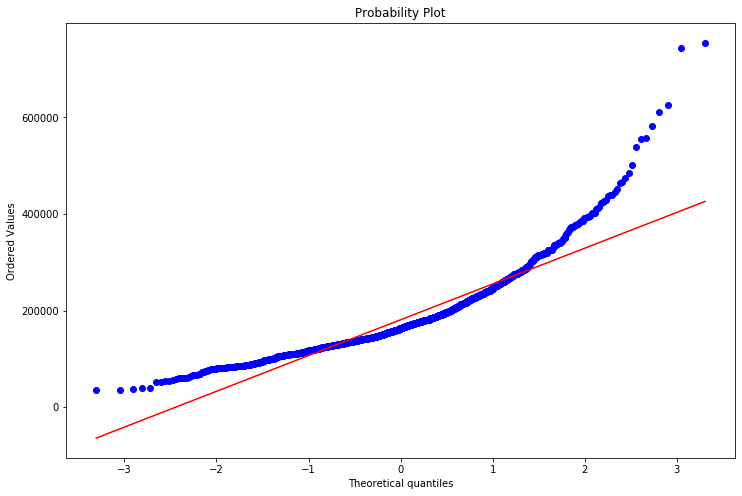

In [10]:
#histogram and normal probability plot
plt.figure(figsize=(12,8))
sns.distplot(train['SalePrice'], fit=norm);

plt.figure(figsize=(12,8))
res = stats.probplot(train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. A simple data transformation can solve the problem.

In [11]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

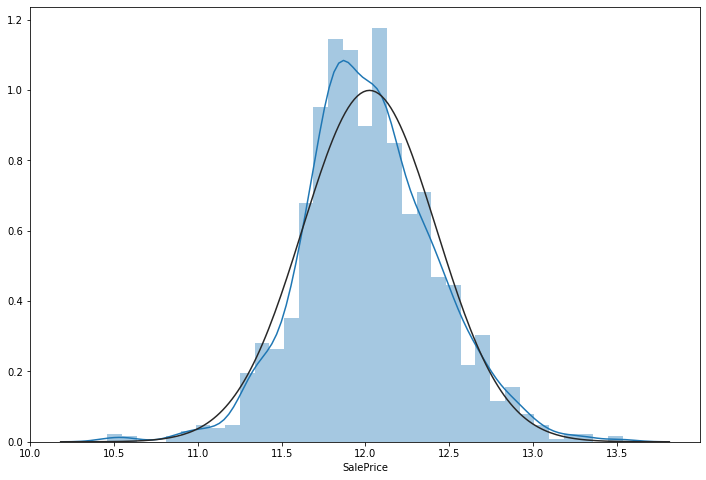

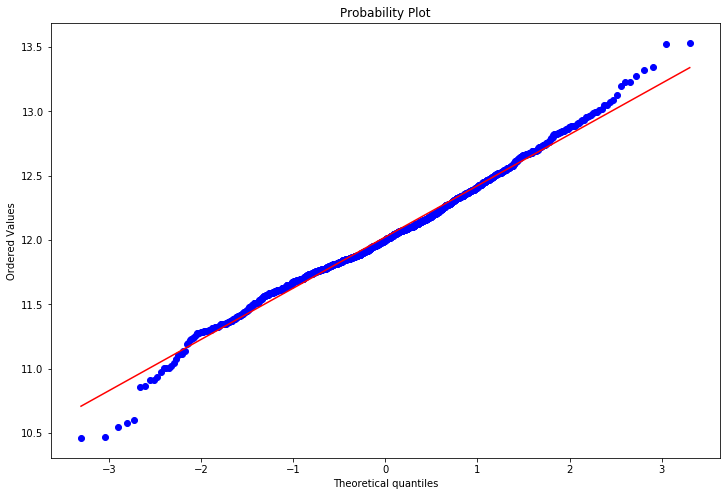

In [12]:
#transformed histogram and normal probability plot
fig = plt.figure(figsize=(12,8))
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure(figsize=(12,8))
res = stats.probplot(train['SalePrice'], plot=plt)

# Separating Numerical and Categorical variables

In [13]:
feature_num = train.select_dtypes(include=[np.number])
feature_num.columns
#sns.heatmap(train.corr(), annot = True)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
feature_cat = train.select_dtypes(include=[np.object])
feature_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Relationship of the target variable with numerical variables

In [15]:
#Finding Correlation coefficients between numeric features and SalePrice
correlation = feature_num.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


(37.0, 0.0)

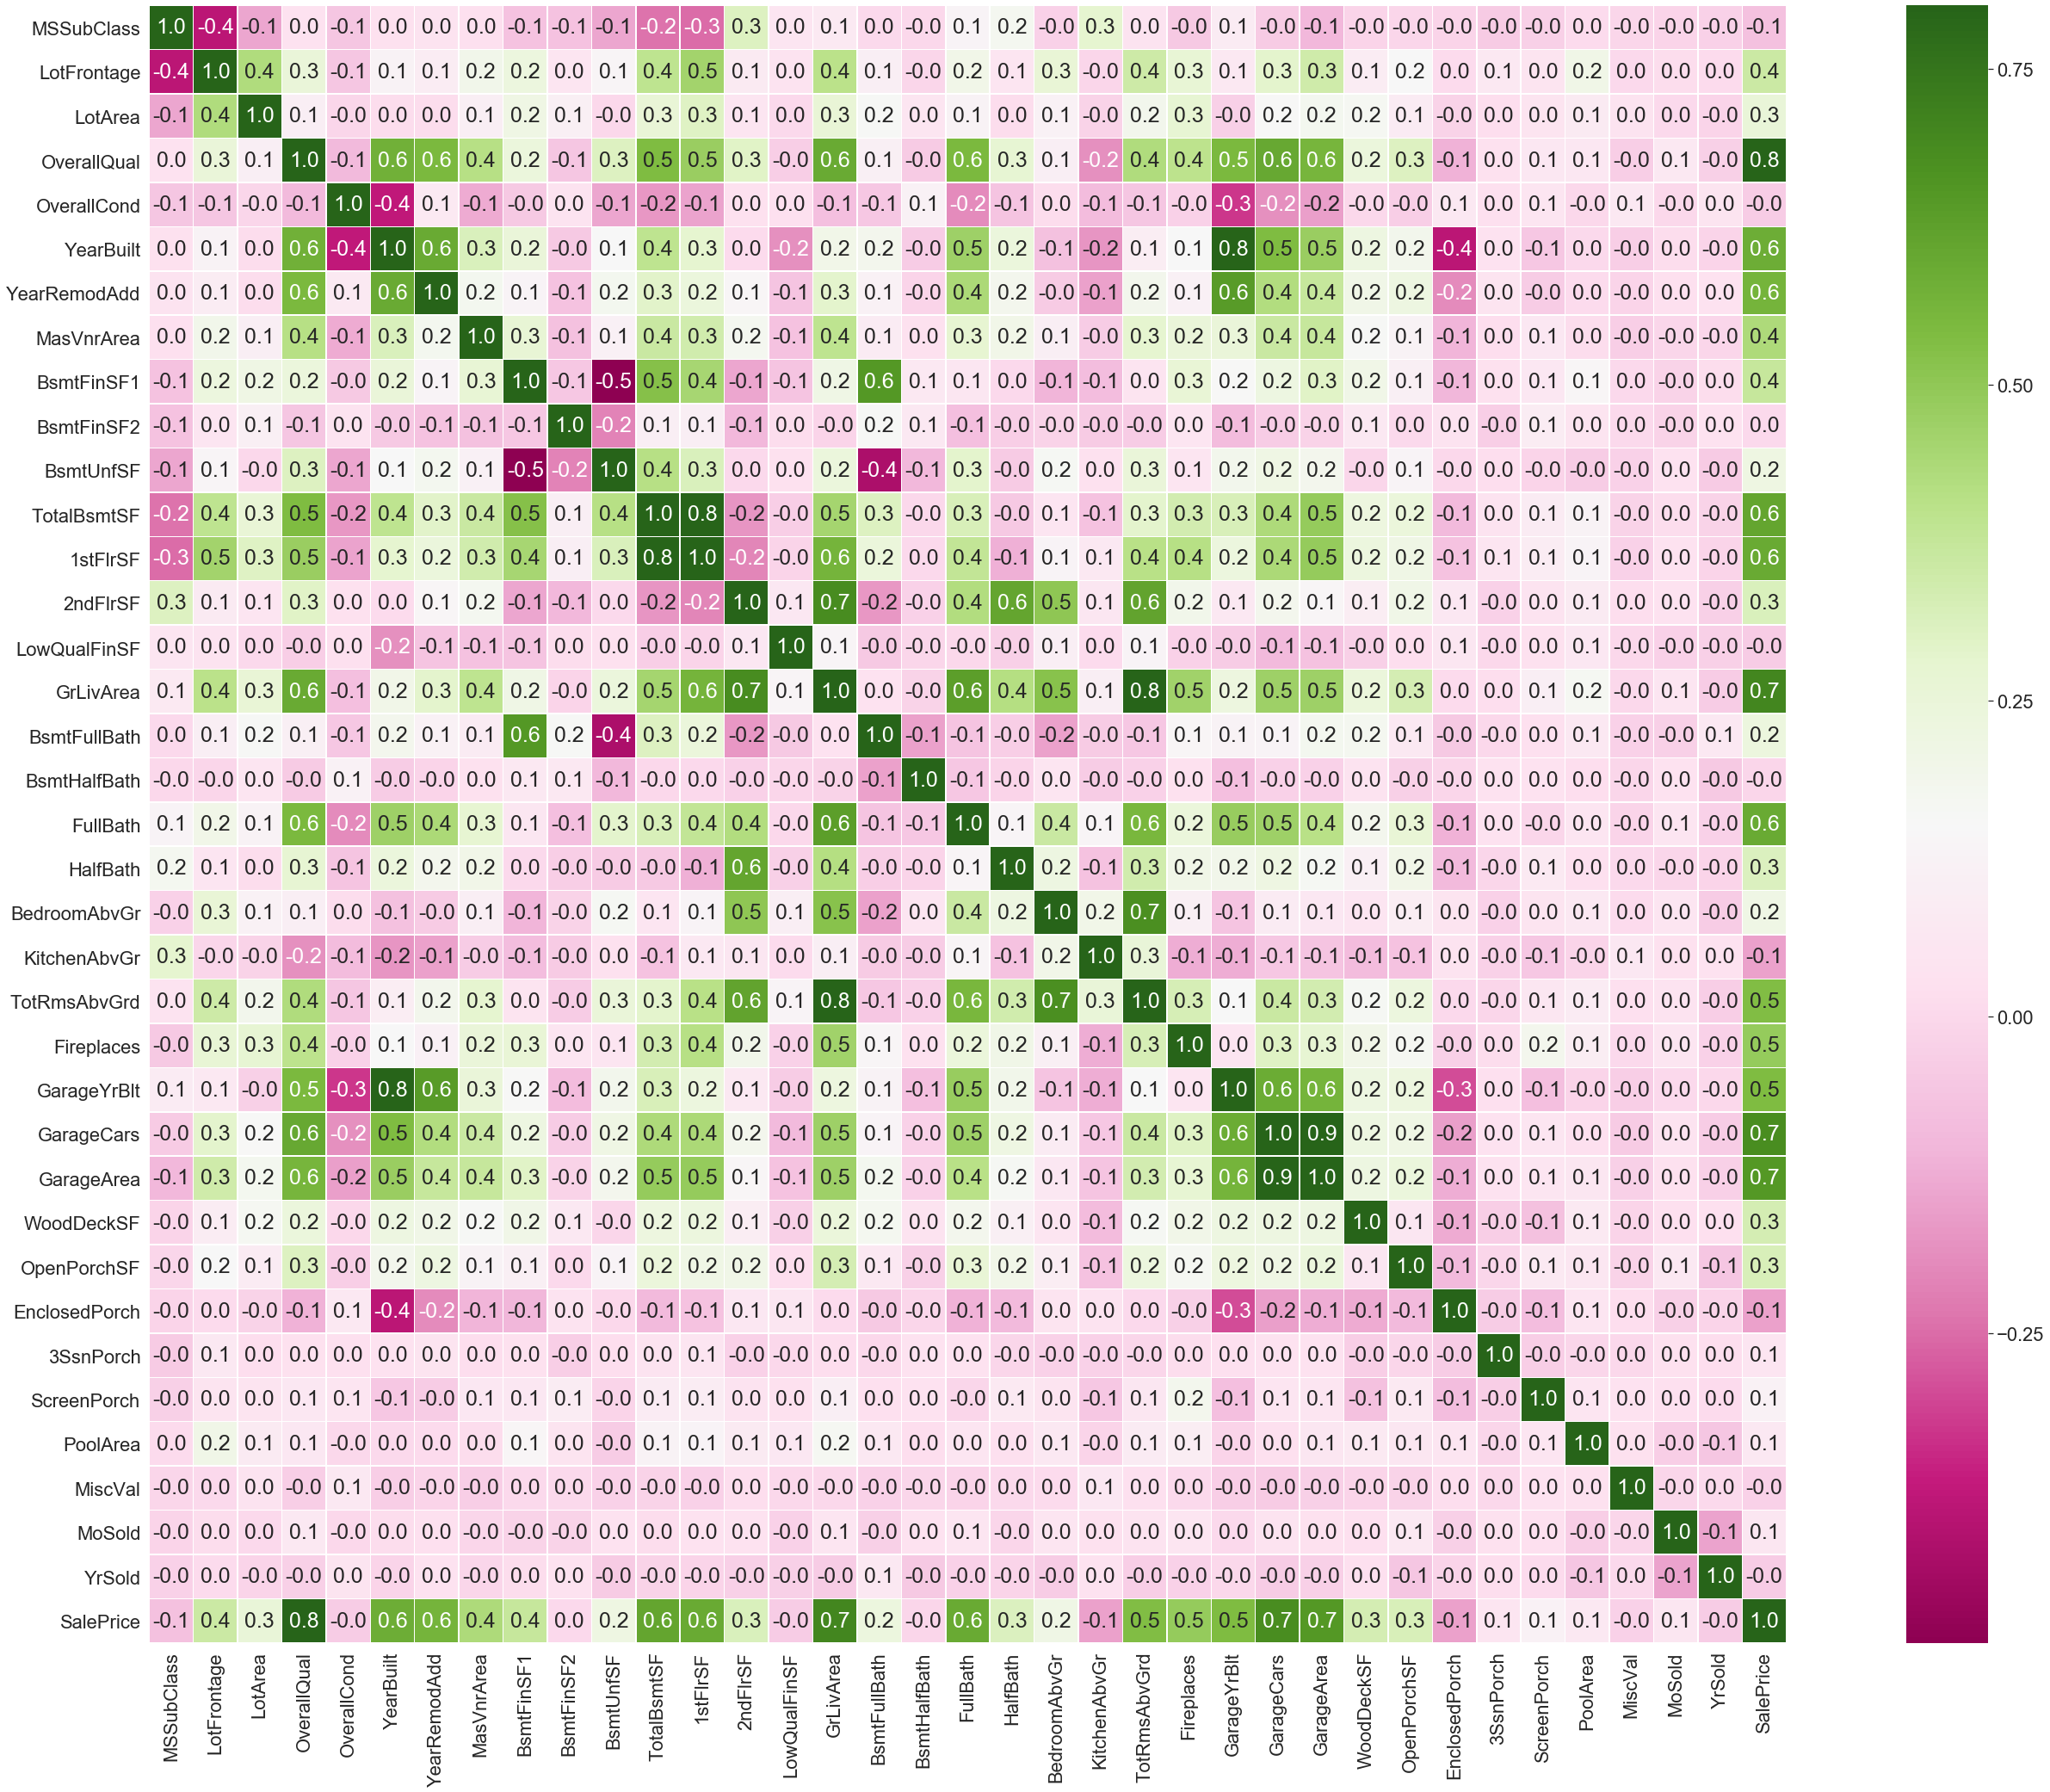

In [16]:
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(feature_num.corr(), square = True, vmax = .8, annot = True, 
                 annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

At initial glance it is observed that there are two green colored squares that get attention.

The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables.
Second one refers to the 'GarageCars' and 'GarageArea'. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.
Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

Another aspect I observed here is the 'SalePrice' correlations. As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' are shaking hands firmly with SalePrice, however we cannot exclude the fact that rest of the features have some level of correlation to the SalePrice.  So, for a clear vision lets limit it to the top most numerical variables.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')


(11.0, 0.0)

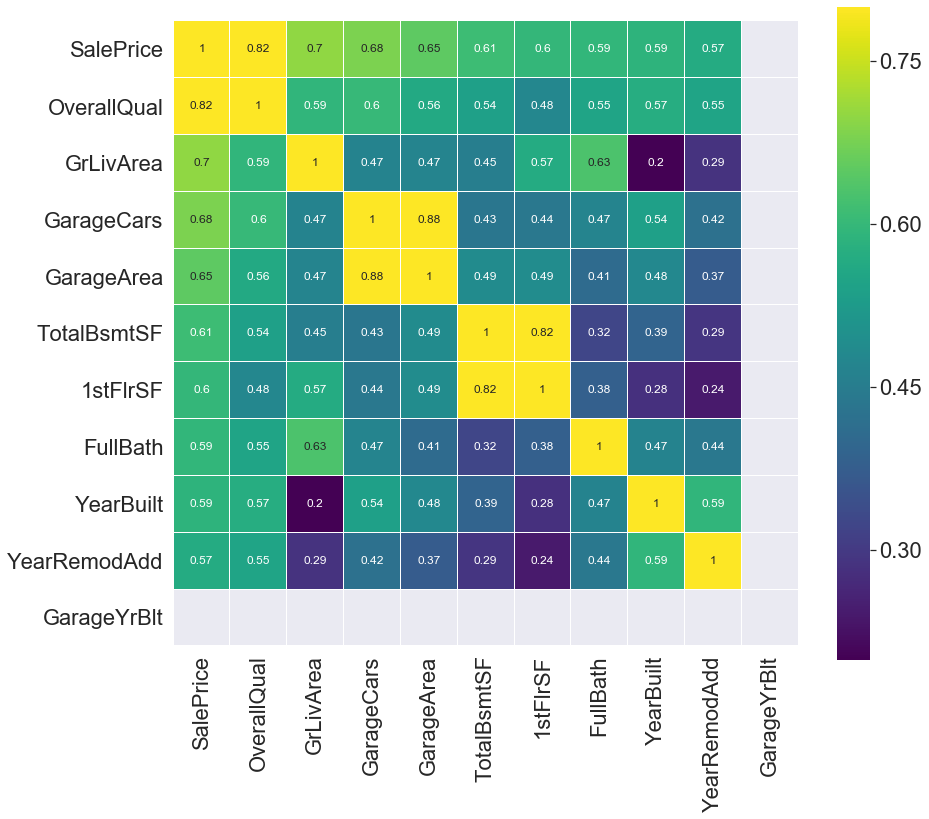

In [17]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize = [14,12])
sns.heatmap(cm, square = True, vmax = 0.8, annot = True, cmap = 'viridis', linewidths=0.01,
            xticklabels = cols.values, yticklabels = cols.values, linecolor = 'white', annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

it is observed that GarageCars & GarageArea are closely correlated . Similarly TotalBsmtSF and 1stFlrSF are also closely correlated. So far we can conclude that

1. OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
3. 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
4. 'TotRmsAbvGrd' and 'GrLivArea', twins
5. 'YearBuilt' it appears like is slightly correlated with 'SalePrice'.

Now that we have gathered some basic information on the data, it’s a good idea to just go a little bit deeper into the challenges that the data might pose.

There are two factors mostly observed in EDA exercise which are missing values and outliers.

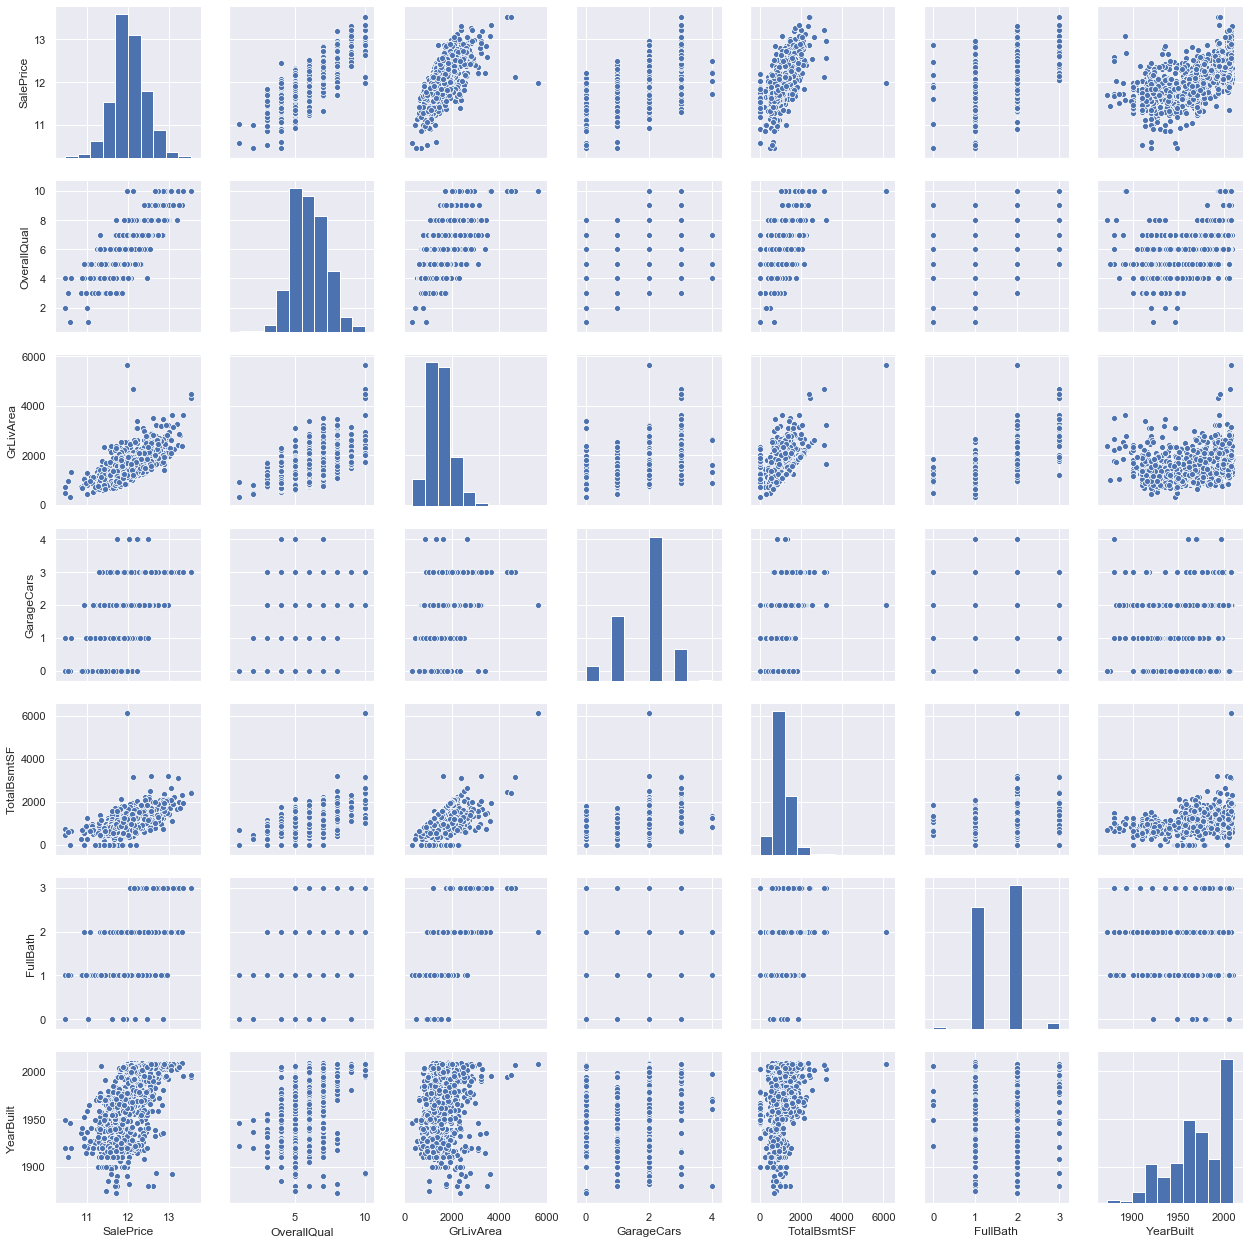

In [18]:
#Here we can see how each feature is correlated with SalePrice.
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Visualization between 'SalePrice' and correlated variables

Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt' features with respect to SalePrice in the form of scatter plot for better understanding.

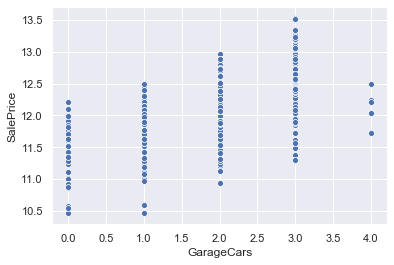

In [19]:
sns.scatterplot(x = train['GarageCars'], y = train['SalePrice'])

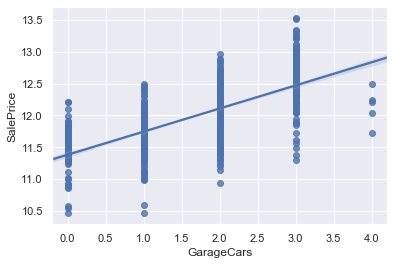

In [20]:
sns.regplot(x = train['GarageCars'], y = train['SalePrice'], scatter = True, fit_reg = True)

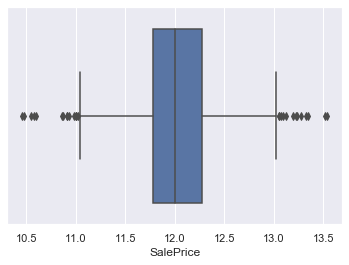

In [21]:
sns.boxplot(train['SalePrice'])

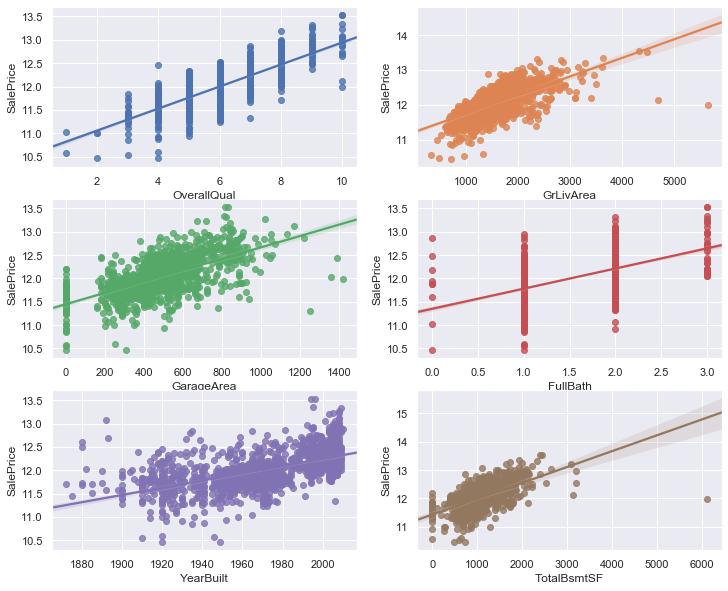

In [22]:
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(ncols = 2, nrows = 3, figsize=(12,10))
sns.regplot(x = train['OverallQual'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = train['GarageArea'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = train['FullBath'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax4)
sns.regplot(x = train['YearBuilt'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax5)
sns.regplot(x = train['TotalBsmtSF'], y = train['SalePrice'], scatter = True, fit_reg = True, ax = ax6)

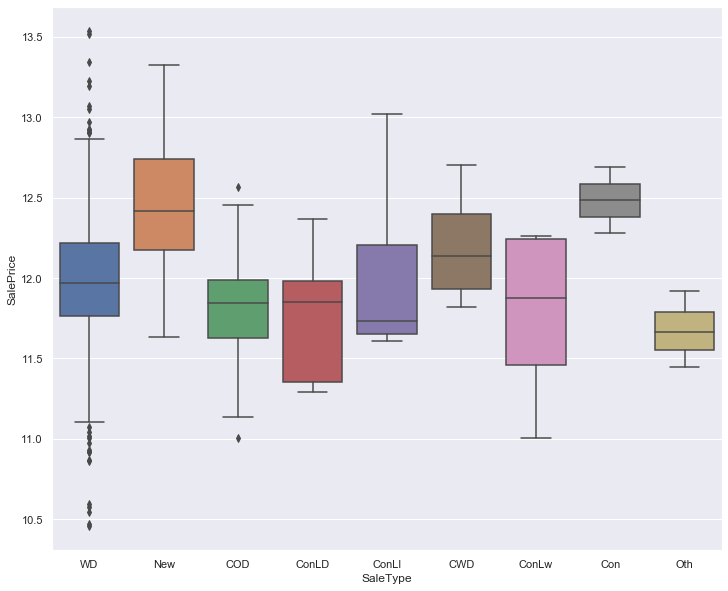

In [23]:
f,ax = plt.subplots(figsize=[12,10])
sns.boxplot(x = train['SaleType'], y = train['SalePrice'])

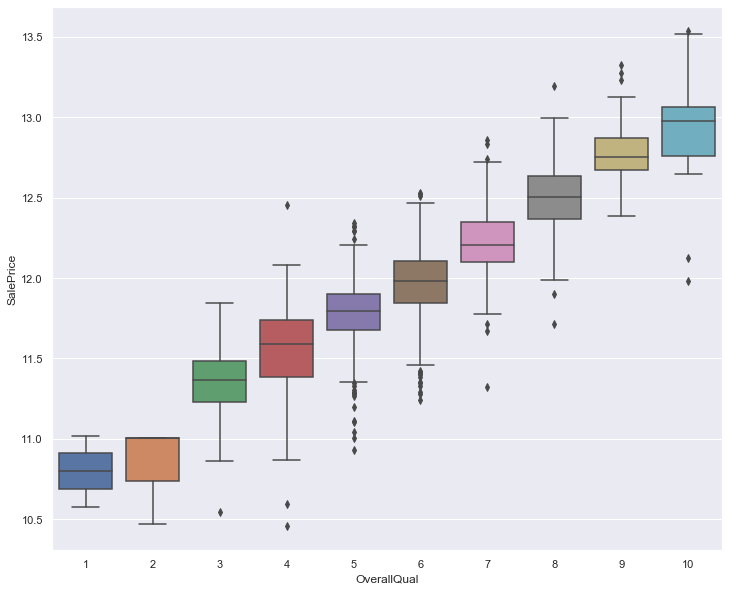

In [24]:
f,ax = plt.subplots(figsize=[12,10])
fig = sns.boxplot(x = train['OverallQual'], y = train['SalePrice'])

In [25]:
first_quartile = train['SalePrice'].quantile(0.25)
third_quartile = train['SalePrice'].quantile(0.75)
IQR = third_quartile-first_quartile
new_boundary = third_quartile+3*IQR
#train.drop(train[train['SalePrice']>new_boundary].index, axis = 0, inplace = True)

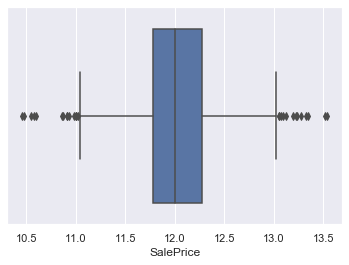

In [26]:
sns.boxplot(train['SalePrice'])

# Locating missing values

In [27]:
#Concatenate train and test
# train.drop("SalePrice", axis = 1, inplace = True)
total = pd.concat((train, test)).reset_index(drop=True)
print(total.shape)


(2919, 80)


In [28]:
#missing value analysis
missing = total.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
missing 

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

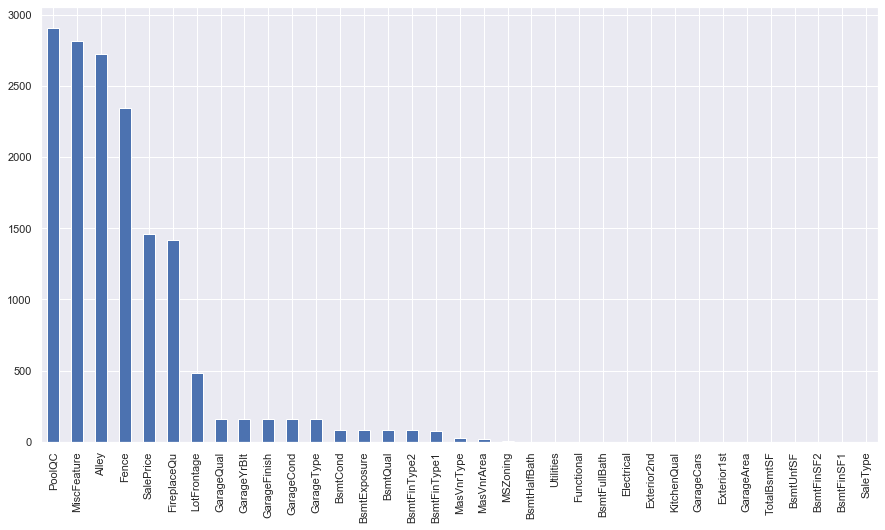

In [29]:
plt.figure(figsize=(15,8))
missing.plot.bar()

In [30]:
feature_tot_num = total.select_dtypes(include=[np.number])
missing_tot_numeric = feature_tot_num.isnull().sum().sort_values(ascending=False)
missing_tot_numeric_percent = (feature_tot_num.isnull().sum()/feature_tot_num.isnull().count()).sort_values(ascending=False)
missing_num_data = pd.concat([missing_tot_numeric, missing_tot_numeric_percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_num_data.index.name =' Numeric Feature'
missing_num_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
SalePrice,1459,0.499829
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrArea,23,0.007879
BsmtFullBath,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFinSF1,1,0.000343
BsmtFinSF2,1,0.000343
TotalBsmtSF,1,0.000343


<Figure size 1080x576 with 0 Axes>

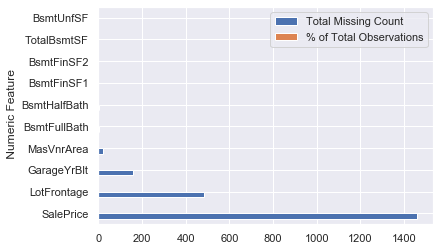

In [31]:
missing_num_data = missing_num_data[missing_num_data>0]

plt.figure(figsize=(15,8))
missing_num_data.head(10).plot.barh()

# Categorical Features
Let us look at the missing values in categorical features in detail

In [32]:
feature_tot_cat = total.select_dtypes(include=[np.object])
missing_tot_cat = feature_tot_cat.isnull().sum().sort_values(ascending=False)
missing_tot_cat_percent = (feature_tot_cat.isnull().sum()/feature_tot_cat.isnull().count()).sort_values(ascending=False)
missing_cat_data = pd.concat([missing_tot_cat, missing_tot_cat_percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_cat_data.index.name =' Categorical Feature'
missing_cat_data.head(25)

,Total Missing Count,% of Total Observations
Categorical Feature,,
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageType,157,0.053786


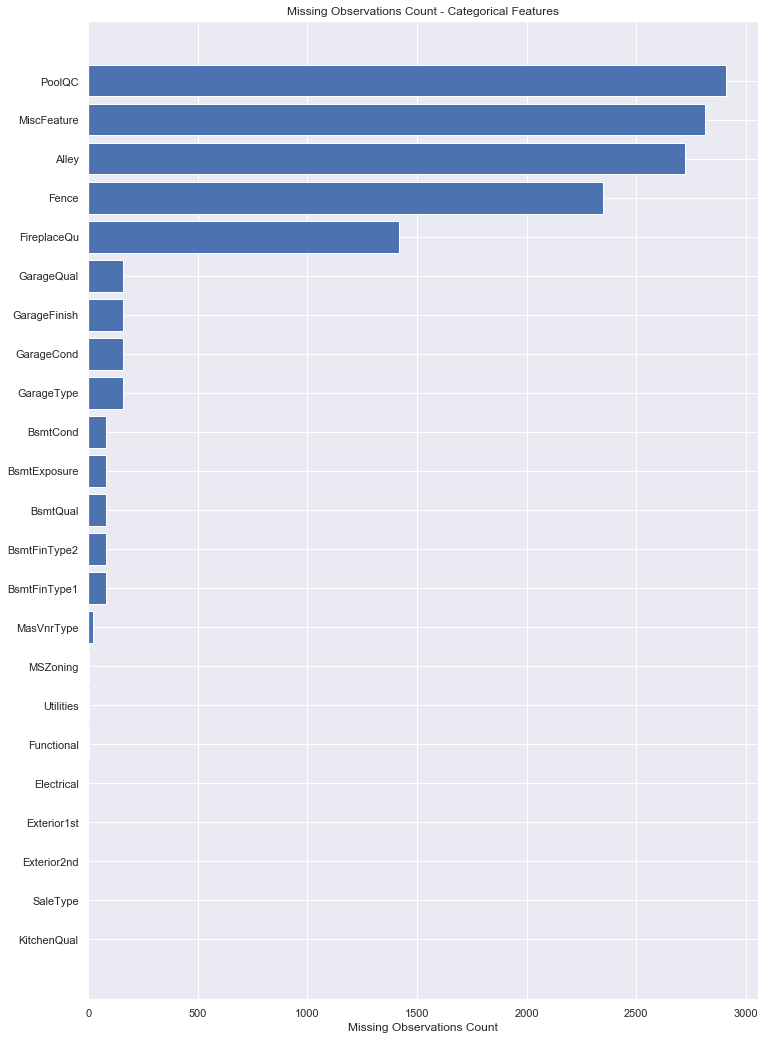

In [33]:
missing_tot_cat = feature_tot_cat.isnull().sum(axis=0).reset_index()
missing_tot_cat.columns = ['column_name', 'missing_count']
missing_tot_cat = missing_tot_cat.loc[missing_tot_cat['missing_count']>0]
missing_tot_cat = missing_tot_cat.sort_values(by='missing_count')

ind = np.arange(missing_tot_cat.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_tot_cat.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_tot_cat.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()


# Preparing the data

In [34]:
# Handle remaining missing values for numerical features by using median as replacementprint("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
feature_num = feature_num.fillna(feature_num.median())

In [35]:
feature_cat = pd.get_dummies(feature_cat)
feature_cat.shape
str(feature_cat.isnull().values.sum())

'0'

In [36]:
#columns to be removed
# 1. multicolinear features like GarageCars and GarageArea, TotalBsmtSF & 1stSF, GrLivArea & TotRmsAbvGrd, 
###GrLivArea & FullBath
# 2. features having more than 20% of the missing values
# 3. features having poor correlation coefficient with the target variable i.e. SalePrice

cols_to_remove = ['LotFrontage', 'Alley', 'WoodDeckSF', 'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 
                  'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', 
                  '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 
                  'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'FireplaceQu', 'Fence', 'MiscFeature', 
                  'PoolQC', 'GarageCars', '1stFlrSF', 'GrLivArea', 'FullBath']

In [37]:
train.drop(cols_to_remove, axis = 1, inplace = True)

# Modeling

In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [39]:
train = pd.concat([feature_cat,feature_num],axis=1)
train.shape

(1460, 289)

In [41]:
#split the data to train the model 
y = train.SalePrice
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 289), (438, 289), (1022,), (438,))

### Defining cross_val_score function for both train and test sets separately

In [42]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

#### Linear model without Regularization

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 6.099720152250266e-11
rmse on train 1.969436718600766e-12


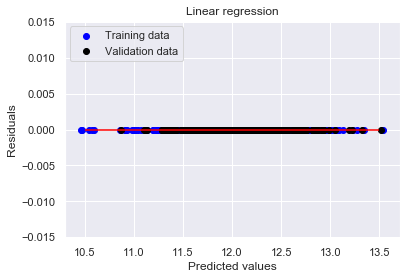

In [44]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

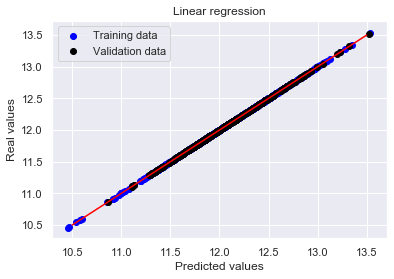

In [45]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()